# Usando os dados dessa base de dados, você irá:

### a. Importe os dados em notebook e atribua à variável chipo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')

chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### b. Selecione e mostre as 10 primeiras entrada

In [3]:
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### c. Quantas observações estão presentes neste DataSet?

In [4]:
print(f'{len(chipo)} observações.')

4622 observações.


### d. Qual o número de colunas neste DataSet?

In [5]:
columns_num = len(chipo.columns)
print(f'{columns_num} colunas.')

5 colunas.


### e. Qual o nome de todas as colunas deste DataSet?

In [6]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### f. Qual o produto mais pedido? Quantas vezes ele foi pedido?

In [7]:
soma_item= chipo.groupby('item_name').quantity.sum()
nome_item = soma_item.idxmax()
quantidade = soma_item.max()

print(f'{nome_item} e foi pedido {quantidade} vezes.')

Chicken Bowl e foi pedido 761 vezes.


### g. Qual foi o pedido mais pedido dentro da coluna choice_description?

In [8]:
soma_item_descri = chipo.groupby('choice_description').quantity.sum()
nome_item_descri = soma_item_descri.idxmax().strip('[]')
quantidade_descri = soma_item_descri.max()

print(f'{nome_item_descri} e foi pedido {quantidade_descri} vezes.')

Diet Coke e foi pedido 159 vezes.


### h. Quantos itens foram pedidos no total?

In [9]:
# Total de produtos pedidos
total_pedidos = chipo.quantity.sum()
print(f'Tiveram {total_pedidos} pedidos.')

Tiveram 4972 pedidos.


In [10]:
# Quantidade de produtos na base de dados
total_produtos = chipo.item_name.unique()
print(len(total_produtos))

50


### i. Qual foi o valor recebido para o período representado nessa base de dados?

In [11]:
chipo['item_price'] = chipo['item_price'].astype(str).str.replace('$','',regex=True).astype(float)
valor_recebido = chipo['item_price'].sum()

print(f'${valor_recebido}.')

$34500.16.


### j. Qual a média do valor recebido por pedido?

In [12]:
soma_por_pedido = chipo.groupby(chipo['order_id']).item_price.sum()
media_por_pedido = soma_por_pedido.mean()
print(f'A média de valor recebido por pedido é de ${round(media_por_pedido,2)}.')

A média de valor recebido por pedido é de $18.81.


### k. Quantos itens diferentes estão esgotados?

A base de dados está incompleta cabendo a pessoa responsável pela obtenção dos dados voltar ao passo de Data Preparation baseado no CRISP-DM. Sugestão: enviar tabela de estoque por item.

### l. Quantos produtos custam mais de $10?

In [13]:
chipo['chipo_unidade'] = chipo['item_price']/chipo['quantity']
chipo_maior_10 = (chipo['chipo_unidade'] > 10).sum()
print(f'{chipo_maior_10} produtos.')

1034 produtos.


### m. Qual o preço para cada um deles?

In [14]:
chipo_preco_maior_10 = chipo[chipo['chipo_unidade'] > 10][['item_name','chipo_unidade']]
chipo_preco_maior_10

,item_name,chipo_unidade
5,Chicken Bowl,10.98
7,Steak Burrito,11.75
13,Chicken Bowl,11.25
23,Chicken Burrito,10.98
39,Barbacoa Bowl,11.75
...,...,...
4610,Steak Burrito,11.75
4611,Veggie Burrito,11.25
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75


### n. Ordene os itens que custam mais de $10 por ordem alfabética.

In [15]:
ordem_alfabetica = chipo_preco_maior_10.sort_values('item_name',ascending=True)
ordem_alfabetica

,item_name,chipo_unidade
1175,Barbacoa Bowl,11.48
2013,Barbacoa Bowl,11.75
2073,Barbacoa Bowl,11.75
4485,Barbacoa Bowl,11.75
471,Barbacoa Bowl,11.48
...,...,...
1884,Veggie Salad Bowl,11.25
4261,Veggie Salad Bowl,11.25
295,Veggie Salad Bowl,11.25
738,Veggie Soft Tacos,11.25


### o. Quantas vezes o item mais caro foi pedido?

In [16]:
itens_mais_caros = chipo[chipo['chipo_unidade'] == chipo['chipo_unidade'].max()]
quantidade = itens_mais_caros['quantity'].sum()

print(f'{quantidade} vezes.')

30 vezes.


### p. Quantas vezes uma Veggie Salad Bowl foi pedida?

In [17]:
veggie = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
total_veggie = veggie['quantity'].sum()

print(f"{total_veggie} vezes.")

18 vezes.


### q. Crie um histograma com os 5 produtos mais pedidos.

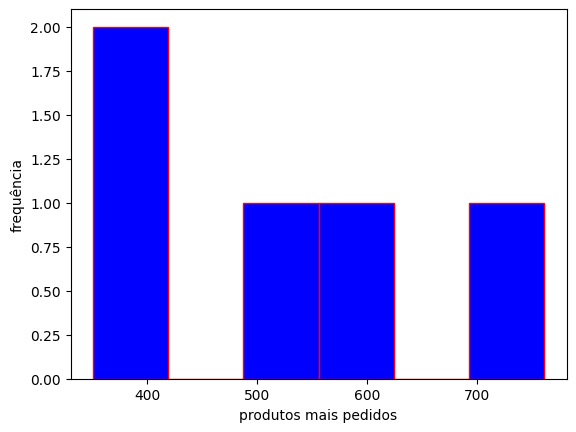

In [18]:
cinco_mais_pedidos = soma_item.sort_values(ascending=False).nlargest(5)
histograma_cinco_mais_pedidos = plt.hist(cinco_mais_pedidos,bins=6,edgecolor='red',color='blue')
plt.xlabel('produtos mais pedidos',fontsize=10)
plt.ylabel('frequência',fontsize=10)
plt.show()

Aqui também será criado um gráfico de barras para mostrar os 5 produtos mais pedidos em relação à quantidade de pedidos.

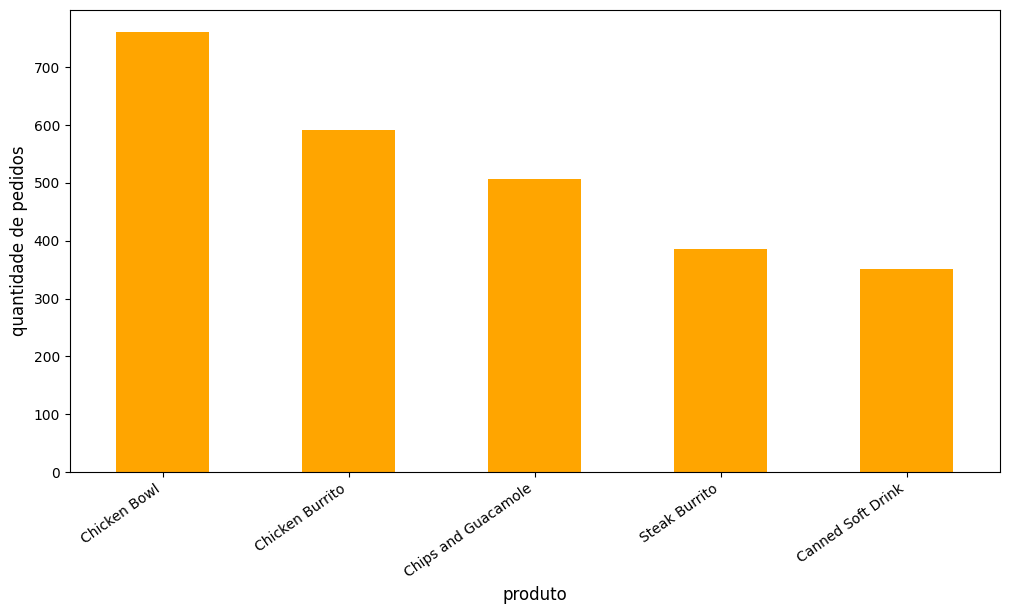

In [19]:
plt.figure(figsize=(12,6))
cinco_mais_pedidos.plot.bar(color='orange')
plt.xlabel('produto',fontsize=12)
plt.ylabel('quantidade de pedidos',fontsize=12)
plt.xticks(rotation=35,ha='right')
plt.show()

### r. Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.

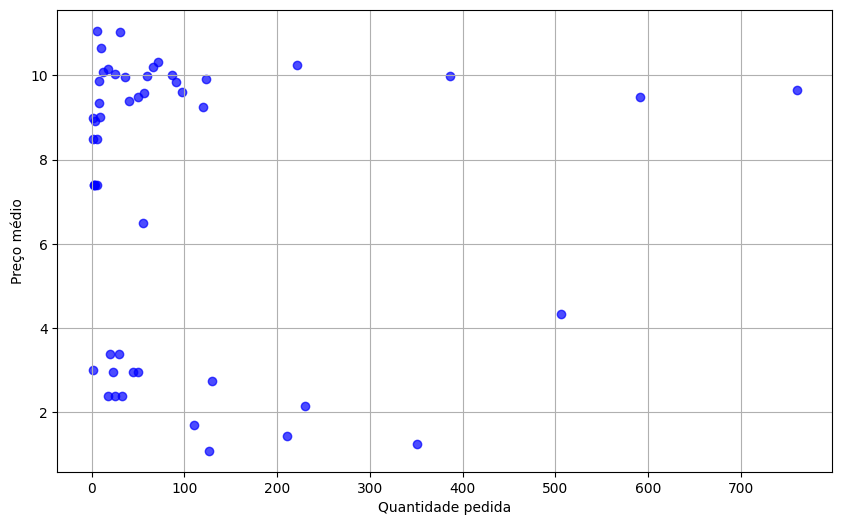

In [20]:
soma_item = chipo.groupby('item_name')['quantity'].sum()
preco_medio = chipo.groupby('item_name')['chipo_unidade'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(soma_item, preco_medio, alpha=0.7,color='blue')
plt.xlabel('Quantidade pedida')
plt.ylabel('Preço médio')
plt.grid(True)

plt.show()

### s. Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

In [21]:
coeficiente_pearson = pearsonr(soma_item,preco_medio)[0]
p_valor = pearsonr(soma_item,preco_medio)[1]
print(f'O coeficiente de Pearson r = {coeficiente_pearson:.3f} mostra que a correlação entre as variáveis pode ser desprezível.')
print(f'p-valor = {p_valor:.2f}')

O coeficiente de Pearson r = -0.046 mostra que a correlação entre as variáveis pode ser desprezível.
p-valor = 0.75


É importante ressaltar que existem casos onde se tem uma correlação fraca, mas ainda assim estatisticamente significativa. Uma forma de ver isso é quando o p-valor está abaixo de 5%, o que leva a descartar a hipótese nula. Não é este caso, pois o p-valor é igual a 0.75, o que leva a hipótese nula.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9e5c53f-79ce-42b6-a5b2-dfed1da41ccf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>